In [6]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt



In [7]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
import os
import cv2
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D
from tensorflow.keras.layers import ReLU, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Activation, Concatenate, BatchNormalization
from numpy import zeros, ones
from numpy.random import randint


In [11]:
################################################################################################################################

In [12]:
source_tmp_folder_path = 'C:\hyundai_cgan_data' + '\\circular_vane_design' + '\\tmp_input_data_circular'
source_dsp_folder_path = 'C:\hyundai_cgan_data' + '\\circular_vane_design' + '\\dsp_input_data_circular'
target_folder_path = 'C:\hyundai_cgan_data' + '\\circular_vane_design'  '\\circular_vane_output'

In [13]:

target_elements = os.listdir(target_folder_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\hyundai_cgan_data\\circular_vane_design\\circular_vane_output'

In [ ]:
source_tmp_elements = os.listdir(source_tmp_folder_path)  
source_dsp_elements = os.listdir(source_dsp_folder_path)  

In [9]:
disc_temp_path = "C:\hyundai_supplement_code\disc_disp_mat"
disc_disp_path = "C:\hyundai_supplement_code\disc_disp_mat"
gen_temp_path = "C:\hyundai_supplement_code\gen_temp_mat"
gen_disp_path = "C:\hyundai_supplement_code\gen_disp_mat"

In [140]:
# DEVELOPING X_train MATRIX

def get_images(tmp_elements,disp_elements,y_elements,size,id):
  X= np.zeros((size,id,id,2))
  
  for index, (tmp_element, dsp_element) in enumerate(zip(tmp_elements, disp_elements)):
      # Load images for each channel
      tmp_element_path = os.path.join(disc_temp_path,str(id))
      tmp_element_path = os.path.join(tmp_element_path,tmp_elements[index])
      dsp_element_path = os.path.join(disc_disp_path,str(id))
      dsp_element_path = os.path.join(dsp_element_path,disp_elements[index])
      img_tmp = imread(tmp_element_path)
      img_dsp = imread(dsp_element_path)

      # Reshape images for each channel
      
      img_tmp = img_tmp.reshape((id,id, 1))
      img_dsp = img_dsp.reshape((id,id, 1))
      
      # Combine channels
      #print(img_tmp.shape)
      img_combined = (np.concatenate((img_tmp, img_dsp), axis=2)-0.5)/0.5

      # Assign to X_train
      X[index] = img_combined
      return X

def get_Y(y_elements,size=20):
  Y= np.zeros((size,256,256,1))
  # DEVELOPING Y_train MATRIX
  for index,Y_train_element in enumerate(y_elements):
      element_path = os.path.join(target_folder_path,target_elements[index])
      #print(element_path)
      img = imread(element_path)
      img = np.mean(img, axis=2)
      img = img/255
      img = img.reshape((256, 256, 1))
      Y[index] = img
  return Y

In [77]:
element_path = os.path.join(disc_temp_path,str(id))
element_path=os.path.join(element_path,tmp_array[0][0])
print(element_path)


C:\hyundai_supplement_code\disc_disp_mat\<built-in function id>\cc_128_disp_cv_1012_in.png


In [59]:
import os

disc_256
disc_temp_128 = sorted(os.listdir(os.path.join(disc_temp_path, '128')))
disc_temp_64 = sorted(os.listdir(os.path.join(disc_temp_path, '64')))
disc_temp_32 = sorted(os.listdir(os.path.join(disc_temp_path, '32')))
disc_temp_16 = sorted(os.listdir(os.path.join(disc_temp_path, '16')))

gen_temp_64 = sorted(os.listdir(os.path.join(gen_temp_path, '64')))
gen_temp_16 = sorted(os.listdir(os.path.join(gen_temp_path, '16')))

disc_disp_128 = sorted(os.listdir(os.path.join(disc_disp_path, '128')))
disc_disp_64 = sorted(os.listdir(os.path.join(disc_disp_path, '64')))
disc_disp_32 = sorted(os.listdir(os.path.join(disc_disp_path, '32')))
disc_disp_16 = sorted(os.listdir(os.path.join(disc_disp_path, '16')))

gen_disp_64 = sorted(os.listdir(os.path.join(gen_disp_path, '64')))
gen_disp_16 = sorted(os.listdir(os.path.join(gen_disp_path, '16')))


tmp_array = [disc_temp_128,disc_temp_64,disc_temp_32,disc_temp_16,gen_temp_64,gen_temp_16]
disp_array = [disc_disp_128,disc_disp_64,disc_disp_32,disc_disp_16,gen_disp_64,gen_disp_16]

In [64]:
tmp_array[0]

'cc_128_disp_cv_1012_in.png'

In [61]:
target_elements[0]

'CIR_VANE_Shape_1012.jpeg'

In [157]:
temp = [342.4,343.8,342.9,341,340.6,345.4,340.5,340.3,337.8,339.4,337.2,345,343.5,339.2,340.5,337.5,340.4,342.8,338.9,341]
disp = [0.4031,0.4140,0.4002,0.3952,0.3912,0.4088,0.3963,0.3956,0.3933,0.3902,0.3886,0.4059,0.4052,0.3996,0.3936,0.3962,0.4052,0.4073,0.3993,0.4006]

In [195]:
for i in range(20): 
    temp[i] = tf.convert_to_tensor(temp[i])
    temp[i]=tf.expand_dims(temp[i], axis=0)
    temp[i]=tf.broadcast_to(temp[i], (1, 1))
    
    disp[i] = tf.convert_to_tensor(disp[i])
    disp[i]=tf.expand_dims(disp[i], axis=0)
    disp[i]=tf.broadcast_to(disp[i], (1, 1))

In [196]:
main_arr = []

#disc
X1=get_images(tmp_array[0],disp_array[0],target_elements,20,128)
X2=get_images(tmp_array[1],disp_array[1],target_elements,20,64)
X3=get_images(tmp_array[2],disp_array[2],target_elements,20,32)
X4=get_images(tmp_array[3],disp_array[3],target_elements,20,16)

temp = np.array(temp)
disp = np.array(disp)

#gen - use X2 and X4

Y = get_Y(target_elements)

In [197]:
batch_size = 1
train_data=tf.data.Dataset.from_tensor_slices((X1,X2,X3,X4,temp,disp,Y))
train_data=train_data.shuffle(10000).batch(batch_size)

In [198]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 64, 64, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 32, 32, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 16, 16, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None))>

In [142]:
Y.shape


(20, 256, 256, 1)

In [116]:
len(main_arr)

1

In [19]:
disc_temp_128

['cc_128_disp_cv_1012_in.png',
 'cc_128_disp_cv_1094_in.png',
 'cc_128_disp_cv_1138_in.png',
 'cc_128_disp_cv_1143_in.png',
 'cc_128_disp_cv_1198_in.png',
 'cc_128_disp_cv_273_in.png',
 'cc_128_disp_cv_453_in.png',
 'cc_128_disp_cv_466_in.png',
 'cc_128_disp_cv_487_in.png',
 'cc_128_disp_cv_522_in.png',
 'cc_128_disp_cv_579_in.png',
 'cc_128_disp_cv_595_in.png',
 'cc_128_disp_cv_605_in.png',
 'cc_128_disp_cv_691_in.png',
 'cc_128_disp_cv_720_in.png',
 'cc_128_disp_cv_75_in.png',
 'cc_128_disp_cv_790_in.png',
 'cc_128_disp_cv_842_in.png',
 'cc_128_disp_cv_870_in.png',
 'cc_128_disp_cv_889_in.png']

In [29]:
gen_temp_64

['cc_64_temp_cv_1012_in.png',
 'cc_64_temp_cv_1094_in.png',
 'cc_64_temp_cv_1138_in.png',
 'cc_64_temp_cv_1143_in.png',
 'cc_64_temp_cv_1198_in.png',
 'cc_64_temp_cv_273_in.png',
 'cc_64_temp_cv_453_in.png',
 'cc_64_temp_cv_466_in.png',
 'cc_64_temp_cv_487_in.png',
 'cc_64_temp_cv_522_in.png',
 'cc_64_temp_cv_579_in.png',
 'cc_64_temp_cv_595_in.png',
 'cc_64_temp_cv_605_in.png',
 'cc_64_temp_cv_691_in.png',
 'cc_64_temp_cv_720_in.png',
 'cc_64_temp_cv_75_in.png',
 'cc_64_temp_cv_790_in.png',
 'cc_64_temp_cv_842_in.png',
 'cc_64_temp_cv_870_in.png',
 'cc_64_temp_cv_889_in.png']

In [32]:
################################################################################################################################

In [13]:
i=0
for elm in disc_temp_128:
    i=i+1    
print(i)

20


In [12]:
i=0
for elm in disc_temp_64:
    i=i+1    
print(i)

20


In [8]:
j=0
for elm in target_elements:
    j=j+1    
print(j)

20


In [36]:
################################################################################################################################

In [35]:
source = np.zeros((20,256,256,2))
target = np.zeros((20,256,256,1))

In [38]:
################################################################################################################################

In [ ]:
train_data=tf.data.Dataset.from_tensor_slices((orig_data,trans_data))

In [ ]:


train_data=train_data.batch(1)
train_data=train_data.shuffle(100)
train_data

In [41]:
################################################################################################################################

In [43]:
source.shape

(20, 256, 256, 2)

In [42]:
target[0].shape

(256, 256, 1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 2)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 1)       67729121  
                                                                 
Total params: 67729121 (258.37 MB)
Trainable params: 67729121 (258.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
################################################################################################################################

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 source_img (InputLayer)     [(None, 256, 256, 2)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 256, 256, 4)          0         ['source_img[0][0]',          
                                                                     'source_img[0][0]']          
                                                                                                  
 sequential_1 (Sequential)   (None, 128, 128, 64)         4096      ['concatenate[0][0]']         
                                                                                                  
 sequential_2 (Sequential)   (None, 64, 64, 128)          131584    ['sequential_1[0][0]']  

In [53]:
gan = gan(generator, discriminator)

In [58]:
gan.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 2)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 256, 256, 2),        6772912   ['input_3[0][0]']             
                              (None, 256, 256, 1)]        1                                       
                                                                                                  
 model_1 (Functional)        (None, 30, 30, 1)            2768385   ['input_3[0][0]',             
                                                                     'model[1][0]',               
                                                                     'model[1][1]']         

In [70]:
def generate_real_samples():
    ix = randint(0, source.shape[0], 1)
    # retrieve selected images
    X1, X2 = source[ix], target[ix]
    # generate 'real' class labels (1)
    y = ones((1, 30, 30, 1))
    return [X1, X2], y

In [72]:
def summarize_performance(step, g_model, n_samples=3):
    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(n_samples, 1)
    
    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
    
    # plot real source images
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_realA[i])
    # plot generated target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples + i)
        plt.axis('off')
        plt.imshow(X_fakeB[i])
    # plot real target image
    for i in range(n_samples):
        plt.subplot(3, n_samples, 1 + n_samples*2 + i)
        plt.axis('off')
        plt.imshow(X_realB[i])
    # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    plt.savefig(filename1)
    plt.close()
    # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [76]:
train(source, target, discriminator, generator, gan )

1/1 [==============================] - 0s 221ms/step


ValueError: Data cardinality is ambiguous:
  x sizes: 1, 1, 1
  y sizes: 2
Make sure all arrays contain the same number of samples.

In [12]:
import tensorflow as tf
def generate_noise(latent_dim):
    noise = tf.random.normal([1,latent_dim])
    return noise


In [13]:
generate_noise(100).shape

TensorShape([1, 100])

In [169]:


def define_discriminator(in_shape=(256,256,1)):  

    condition = Input(shape=(256,256,2))  
    in_image = Input(shape=in_shape)   #
    
    x1 = Input(shape=(128,128,2))

    
    x2 = Input(shape=(64,64,2))

    
    x3 = Input(shape=(32,32,2))
   
    
    x4 = Input(shape=(16,16,2))
   
    
    merge = Concatenate()([condition,in_image])
     

    

    disc = Conv2D(64, (4,4), strides=(2,2), padding='same')(merge)
    disc = Concatenate()([disc,x1 ]) 
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)
    
    disc = Conv2D(128, (4,4), strides=(2,2), padding='same')(disc)
    disc = Concatenate()([disc,x2 ]) 
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)
    
    disc = Conv2D(256, (4,4), strides=(2,2), padding='same')(disc)
    disc = Concatenate()([disc,x3 ]) 
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)
    
    disc = Conv2D(512, (4,4), strides=(2,2), padding='same')(disc)
    disc = Concatenate()([disc,x4 ]) 
    disc = LeakyReLU(alpha=0.2)(disc)
    disc = Dropout(0.2)(disc)

    
    

    
    layer = Flatten()(disc)
   

    out_layer = Dense(1, activation='sigmoid')(layer)  

    model = Model([in_image, condition,x1,x2,x3,x4], out_layer)
    model.summary()
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


In [170]:
discriminator = define_discriminator()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_51 (InputLayer)       [(None, 256, 256, 2)]        0         []                            
                                                                                                  
 input_52 (InputLayer)       [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 concatenate_26 (Concatenat  (None, 256, 256, 3)          0         ['input_51[0][0]',            
 e)                                                                  'input_52[0][0]']            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 128, 128, 64)         3136      ['concatenate_26[0][0]']

In [171]:
def define_generator(latent_dim=100,nodes=4096):

    g1 = Input(shape=(16,16,2))
    
    
    g2 = Input(shape=(64,64,2))
   
    
    in_label_1 = Input(shape=(1,))  
    in_label_2 = Input(shape=(1,))
    
    latent =  Input(shape=(latent_dim,))
    merge = Concatenate()([latent, in_label_1,in_label_2]) 
    
    merge = Dense(nodes)(merge)
    gen = Reshape((4, 4, 256))(merge) 
    
    
    
    gen = Conv2DTranspose(128, (4,4), strides=(4,4), padding='same')(gen)  
    merge1 = Concatenate()([gen, g1]) 
    
    gen = BatchNormalization()(merge1)
    gen = LeakyReLU(alpha=0.2)(gen)
    
    
    gen = Conv2DTranspose(64, (4,4), strides=(4,4), padding='same')(gen) 
    merge2 = Concatenate()([gen, g2]) 
    gen = BatchNormalization()(merge2)
    gen = LeakyReLU(alpha=0.2)(gen)

    
    gen_out = Conv2DTranspose(1, (4,4), strides=(4,4), padding='same')(gen) 


  
    
    model = Model([latent, in_label_1,in_label_2,g1,g2], gen_out)
    
    model.summary()
    return model   


In [173]:
generator = define_generator()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_66 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 input_64 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_65 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 concatenate_34 (Concatenat  (None, 102)                  0         ['input_66[0][0]',            
 e)                                                                  'input_64[0][0]',      

# def gen_train(tr_size=20,latent_dim=100,nodes=4096):
    for i in range(tr_size):    
        temp1= cv2.imread(gen_temp_64[i])
        disp1 = cv2.imread(gen_disp_64[i])
        temp2= cv2.imread(gen_temp_16[i])
        disp2 = cv2.imread(gen_disp_16[i])
    
        temp_1 = tf.expand_dims(temp1, axis=0)
        disp_1 = tf.expand_dims(disp1,axis=0)
        temp_2 = tf.expand_dims(temp2, axis=0)
        disp_2 = tf.expand_dims(disp2,axis=0)
        
        latent = generate_noise(100)
        
        generator_model = define_generator(latent_dim=latent_dim, nodes=nodes)
        

        gen_output = generator_model([latent, temp_1, disp_1, temp_2, disp_2])
       
        
    

In [19]:

def disc_train(tr_size=20,temp,disp,in_shape=(256,256,1)):
    
    for i in range(tr_size):
        in_image = 
        
        condition = source[i]
        
        temp1= cv2.imread(disc_temp_128[i])
        disp1 = cv2.imread(disc_disp_128[i])
        temp2= cv2.imread(disc_temp_64[i])
        disp2 = cv2.imread(disc_disp_64[i])
        temp3= cv2.imread(disc_temp_32[i])
        disp3 = cv2.imread(disc_disp_32[i])
        temp4= cv2.imread(disc_temp_16[i])
        disp4 = cv2.imread(disc_disp_16[i])
        
        temp_1 = tf.expand_dims(temp1, axis=0)
        disp_1 = tf.expand_dims(disp1,axis=0)
        temp_2 = tf.expand_dims(temp2, axis=0)
        disp_2 = tf.expand_dims(disp2,axis=0)
        temp_3 = tf.expand_dims(temp3, axis=0)
        disp_3 = tf.expand_dims(disp3,axis=0)
        temp_4 = tf.expand_dims(temp4, axis=0)
        disp_4 = tf.expand_dims(disp4,axis=0)
    

      
        
        disc_model = define_discriminator(in_shape)
        

        disc_output = disc_model([in_image,condition, temp_1, disp_1, temp_2, disp_2,temp_3,disp_3,temp_4,disp_4])
        
        
    

In [162]:
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

def disc_loss(real_output,fake_output):
  real_loss=loss(tf.ones_like(real_output),real_output)
  fake_loss=loss(tf.zeros_like(fake_output),fake_output)
  return real_loss+fake_loss


def gen_loss(generated_output):
  
  
  gan_loss = loss(tf.ones_like(generated_output), generated_output)
  gan_loss = tf.cast(gan_loss,tf.float64)

  return gan_loss

In [44]:
gen_opt=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5,beta_2=0.999)
disc_opt=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5,beta_2=0.999)

In [160]:
import tensorflow as tf
def generate_noise(latent_dim=100):
    noise = tf.random.normal([1,latent_dim])
    return noise


In [174]:

def compare_images(latent, t,d,g1,g2,target,epoch):
  generated = generator([latent, t,d,g1,g2], training=True)
  plt.figure(figsize=(15,5))

  images_list = [target[0], generated[0]]
  title = ['Real (ground truth)', 'Generated Image (fake)']

  for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(title[i])
    plt.imshow(images_list[i],cmap='gray')
    plt.axis('off')
  plt.suptitle(f'Epoch {epoch}')
  plt.show()

In [206]:

def train_step( t,d,x1,x2,x3,x4,real):
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    latent =  generate_noise()
    g_output = generator([latent, t,d,x4,x2],training=True)
    
    d_output_real = discriminator([real, condition,x1,x2,x3,x4],training=True)
    
    d_generated_output = discriminator([g_output, x2,x3,x4],training=True)
    
    g_loss_total =gen_loss(d_generated_output)
    
    d_loss = disc_loss(d_output_real, d_generated_output)
    
  gradients_generator = g_tape.gradient(g_loss_total, generator.trainable_variables)
  gradients_discriminator = d_tape.gradient(d_loss, discriminator.trainable_variables)
  gen_opt.apply_gradients(zip(gradients_generator, generator.trainable_variables))
  disc_opt.apply_gradients(zip(gradients_discriminator, discriminator.trainable_variables))

In [209]:
from IPython import display
def train(train_set,steps):
  X1,X2,X3,X4,T,D,Y = next(iter(train_set.take(1)))
  for step, (x1,x2,x3,x4,t,d,y) in train_set.repeat().take(steps).enumerate():
    print('Step ',step)
    if step % 20 == 0:
      #display.clear_output(wait = True)
      compare_images(generate_noise(),t,d,x4,x2,y , step)
      print(f"step: {step}")
    train_step( t,d,x1,x2,x3,x4, y)

Step  tf.Tensor(0, shape=(), dtype=int64)


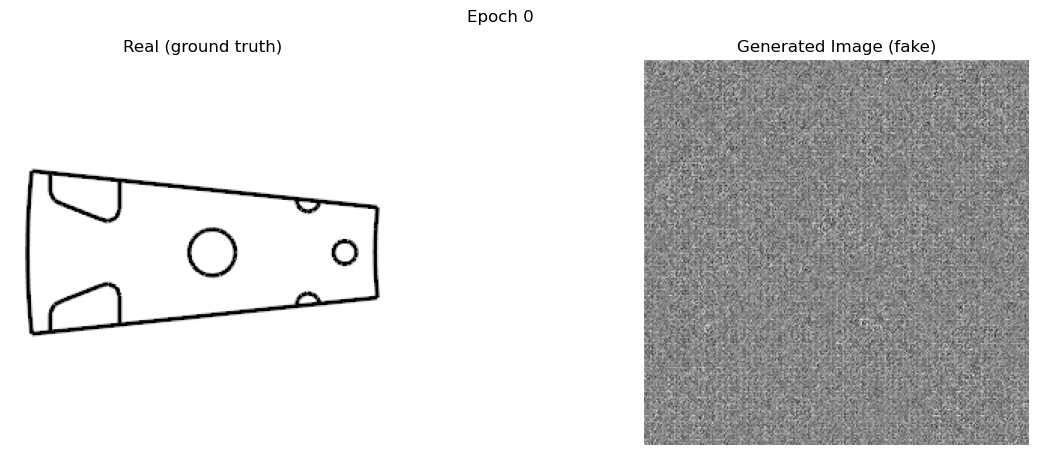

step: 0


NameError: in user code:

    File "C:\Users\IITH\AppData\Local\Temp\ipykernel_8628\934435219.py", line 7, in train_step  *
        d_output_real = discriminator([real, condition,x1,x2,x3,x4],training=True)

    NameError: name 'condition' is not defined


In [210]:
train(train_data,100)